In [36]:
import pandas as pd
classifications = pd.read_csv("./partitioned_genes.csv")
importance_scores = pd.read_csv("./DATA/importance_scores_BIPOLAR_RWR.tsv", sep="\t")
importance_name = "RWR Bipolar"

In [37]:
merged_df = importance_scores.merge(
    classifications[['claim_name', 'partition_number']],
    left_on='claim_name',
    right_on='claim_name',
    how='left'
)
merged_df.head()

,index,score,claim_name,ncbi_gene_id,partition_number
0,97,0.003570,CYP1A2,1544,4.0
1,85,0.003567,CYP3A4,1576,4.0
2,0,0.003240,CYP2D6,1565,4.0
3,31,0.002708,DRD2,1813,1.0
4,47,0.002567,CYP2C9,1559,4.0


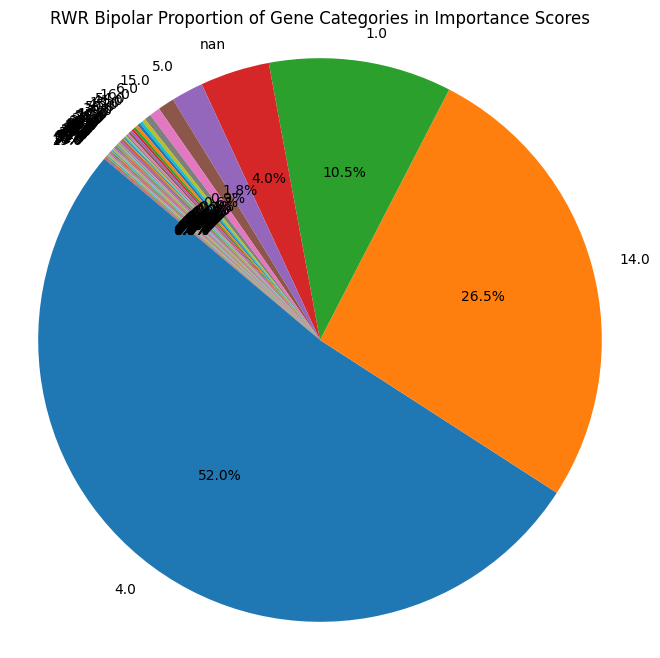

In [38]:
import matplotlib.pyplot as plt

# Count the number of genes in each category
category_counts = merged_df['partition_number'].value_counts(dropna=False)  # include NaNs if any
category_percent = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
plt.title(importance_name + ' Proportion of Gene Categories in Importance Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


C:\Users\richa\AppData\Local\Temp\ipykernel_36276\499123774.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = merged_df.groupby(['score_bin', 'partition_number']).size().unstack(fill_value=0)
C:\Users\richa\AppData\Local\Temp\ipykernel_36276\499123774.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


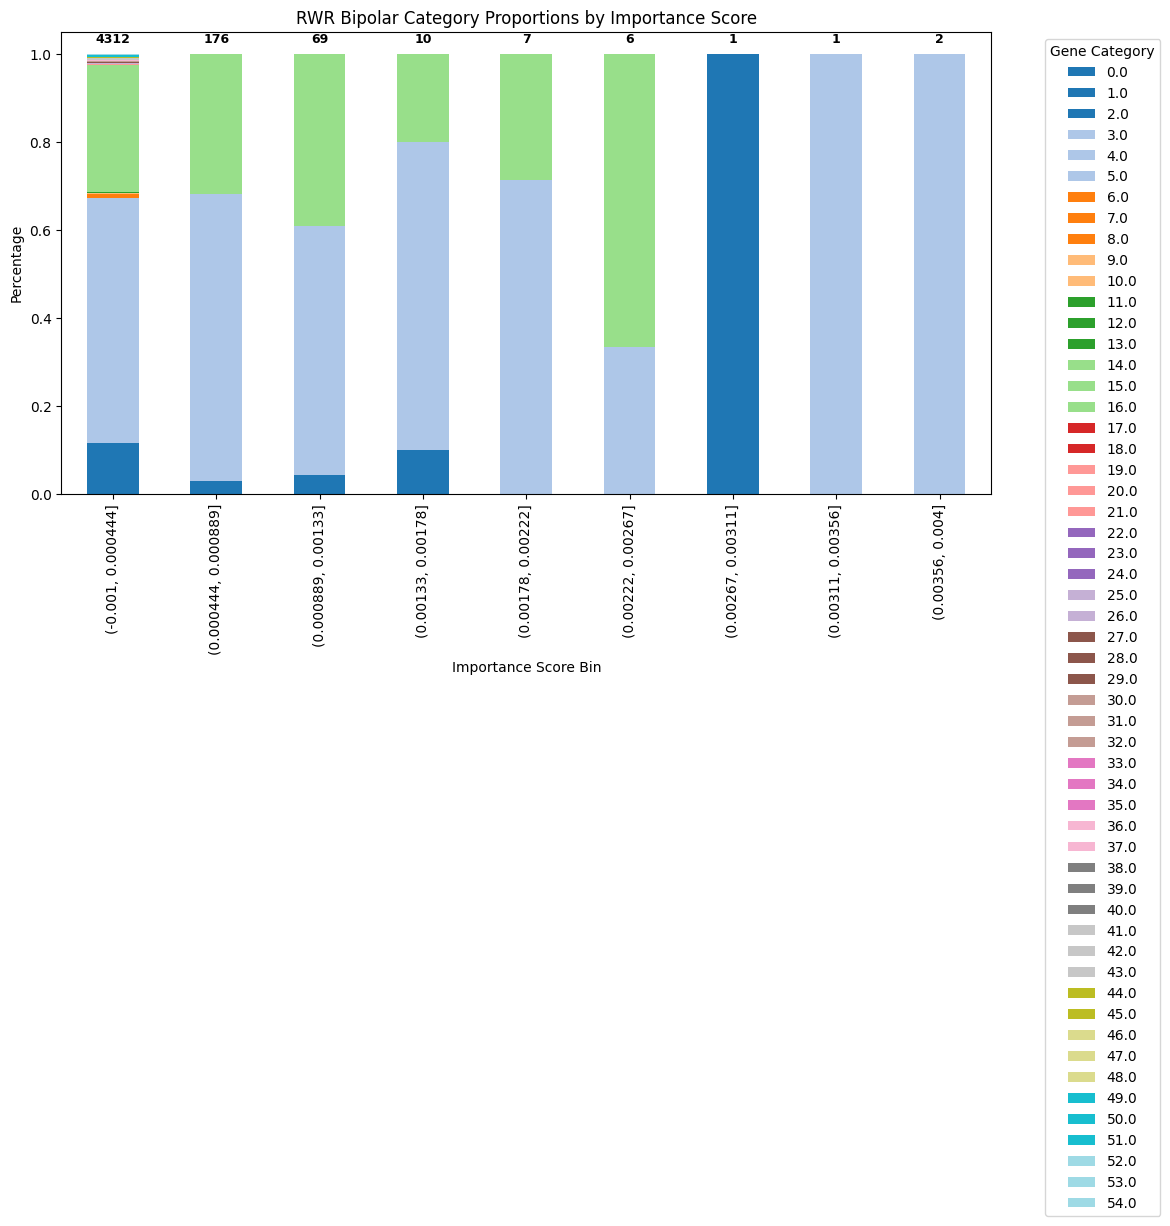

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bin the scores
bins = np.linspace(0, 0.004, 10)
merged_df['score_bin'] = pd.cut(merged_df['score'], bins=bins, include_lowest=True)

# Count number of each category in each bin
binned = merged_df.groupby(['score_bin', 'partition_number']).size().unstack(fill_value=0)

# Get total counts for annotation
bin_totals = binned.sum(axis=1)

# Normalize to percentages for plotting
binned_percent = binned.div(bin_totals, axis=0)

# Plot
ax = binned_percent.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12, 6)
)

# Annotate each bar with the total count
for idx, total in enumerate(bin_totals):
    ax.text(
        idx, 1.02, str(total),  # x-position, y-position (slightly above the bar), text
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.ylabel('Percentage')
plt.xlabel('Importance Score Bin')
plt.title(importance_name + ' Category Proportions by Importance Score')
plt.legend(title='Gene Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [40]:
ncbi_classifications = pd.read_csv("../NCBI_9606_DGIDB_MSIGDB_genes_ONLY.csv")
ncbi_classifications

,GeneID,Symbol,description,Predicted_Category,Category_Scores,All_Categories
0,1,A1BG,alpha-1-B glycoprotein,Metabolism,"[0.22551503777503967, 0.16717307269573212, 0.1...","['Metabolism', 'Cell Cycle Regulation', 'Signa..."
1,2,A2M,alpha-2-macroglobulin,Metabolism,"[0.43418872356414795, 0.12522055208683014, 0.1...","['Metabolism', 'Immune', 'Cell Cycle Regulatio..."
2,3,A2MP1,alpha-2-macroglobulin pseudogene 1,Immune,"[0.24453799426555634, 0.1882738471031189, 0.12...","['Immune', 'Metabolism', 'Cell Cycle Regulatio..."
3,9,NAT1,N-acetyltransferase 1,Metabolism,"[0.2627515494823456, 0.17127400636672974, 0.16...","['Metabolism', 'Cell Cycle Regulation', 'Immun..."
4,10,NAT2,N-acetyltransferase 2,Metabolism,"[0.24395442008972168, 0.1586693972349167, 0.15...","['Metabolism', 'Cell Cycle Regulation', 'Immun..."
...,...,...,...,...,...,...
193433,140577506,GRIK1-AS3,GRIK1 antisense RNA 3,Not in DGIDB or MSigDB,NaN,NaN
193434,140577507,CFTR-AS2,CFTR antisense RNA 2,Not in DGIDB or MSigDB,NaN,NaN
193435,140577508,POLR2F-AS1,POLR2F antisense RNA 1,Not in DGIDB or MSigDB,NaN,NaN
193436,140577509,FOLR1-AS1,FOLR1 antisense RNA 1,Not in DGIDB or MSigDB,NaN,NaN


In [41]:
ncbi_merged_df = ncbi_classifications.merge(
    merged_df,
    left_on='GeneID',
    right_on='ncbi_gene_id',
    how='left'
)
ncbi_merged_df

,GeneID,Symbol,description,Predicted_Category,Category_Scores,All_Categories,index,score,claim_name,ncbi_gene_id,partition_number,score_bin
0,1,A1BG,alpha-1-B glycoprotein,Metabolism,"[0.22551503777503967, 0.16717307269573212, 0.1...","['Metabolism', 'Cell Cycle Regulation', 'Signa...",169.0,0.002144,A1BG,1.0,4.0,"(0.00178, 0.00222]"
1,2,A2M,alpha-2-macroglobulin,Metabolism,"[0.43418872356414795, 0.12522055208683014, 0.1...","['Metabolism', 'Immune', 'Cell Cycle Regulatio...",427.0,0.001634,A2M,2.0,14.0,"(0.00133, 0.00178]"
2,3,A2MP1,alpha-2-macroglobulin pseudogene 1,Immune,"[0.24453799426555634, 0.1882738471031189, 0.12...","['Immune', 'Metabolism', 'Cell Cycle Regulatio...",296.0,0.001634,A2MP1,3.0,4.0,"(0.00133, 0.00178]"
3,9,NAT1,N-acetyltransferase 1,Metabolism,"[0.2627515494823456, 0.17127400636672974, 0.16...","['Metabolism', 'Cell Cycle Regulation', 'Immun...",2464.0,0.000168,NAT1,9.0,4.0,"(-0.001, 0.000444]"
4,10,NAT2,N-acetyltransferase 2,Metabolism,"[0.24395442008972168, 0.1586693972349167, 0.15...","['Metabolism', 'Cell Cycle Regulation', 'Immun...",462.0,0.001268,NAT2,10.0,4.0,"(0.000889, 0.00133]"
...,...,...,...,...,...,...,...,...,...,...,...,...
193433,140577506,GRIK1-AS3,GRIK1 antisense RNA 3,Not in DGIDB or MSigDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193434,140577507,CFTR-AS2,CFTR antisense RNA 2,Not in DGIDB or MSigDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193435,140577508,POLR2F-AS1,POLR2F antisense RNA 1,Not in DGIDB or MSigDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193436,140577509,FOLR1-AS1,FOLR1 antisense RNA 1,Not in DGIDB or MSigDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


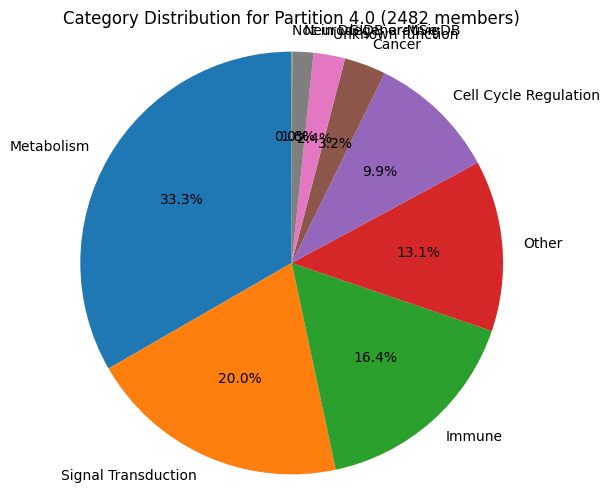

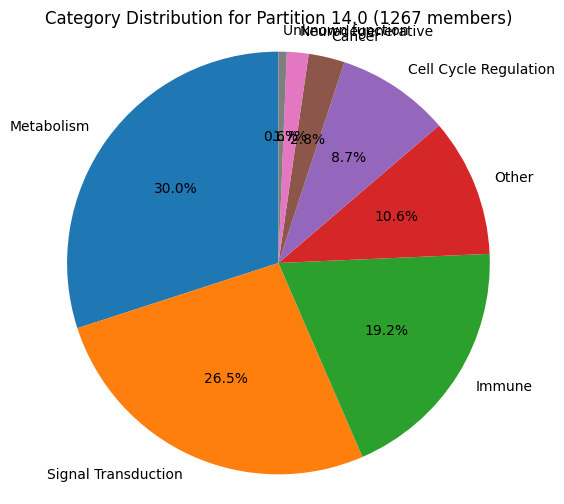

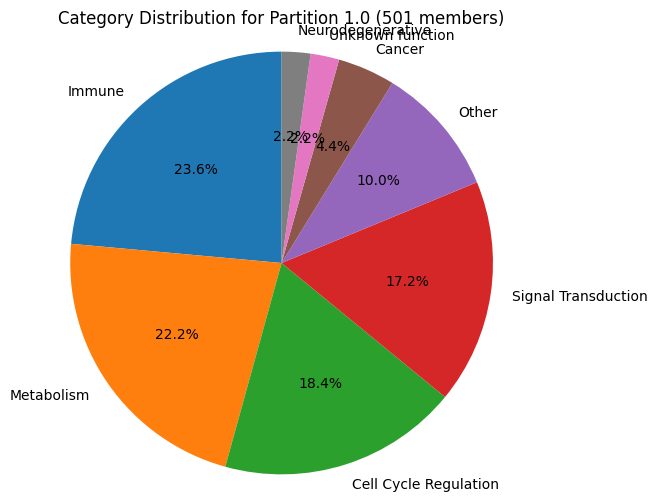

In [42]:
# Group by partition_number and filter partitions with 200+ members
partition_counts = ncbi_merged_df['partition_number'].value_counts()
large_partitions = partition_counts[partition_counts >= 200].index

# Filter df for those large partitions
df_large_partitions = ncbi_merged_df[ncbi_merged_df['partition_number'].isin(large_partitions)]

# Create pie charts for each large partition
for partition in large_partitions:
    # Filter the data for the current partition
    partition_data = df_large_partitions[df_large_partitions['partition_number'] == partition]
    
    # Count the occurrences of each category
    category_counts = partition_data['Predicted_Category'].value_counts()
     # Get the count of members in the partition
    member_count = len(partition_data)
    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Category Distribution for Partition {partition} ({member_count} members)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.show()